## Install category encoder

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.4MB/s 


## Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/Daffa404/KKB_Tugas/master/Final%20Project/lol_ranked_games.csv

--2021-01-18 12:11:58--  https://raw.githubusercontent.com/Daffa404/KKB_Tugas/master/Final%20Project/lol_ranked_games.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38679427 (37M) [text/plain]
Saving to: ‘lol_ranked_games.csv’

lol_ranked_games.cs 100%[===================>]  36.89M  78.0MB/s    in 0.5s    

2021-01-18 12:11:59 (78.0 MB/s) - ‘lol_ranked_games.csv’ saved [38679427/38679427]



## Import

In [ ]:
# Utils
import time
import pandas as pd # Dataframe
import numpy as np
import math

# Model related
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from category_encoders.target_encoder import TargetEncoder

# Visualisasi
from sklearn import tree # Visualisasi Decision Tree
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Persiapan dataset

Load dataset

In [ ]:
df = pd.read_csv('/content/lol_ranked_games.csv')
df.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,13,13,16,49,7,12


Banyaknya Id yang berbeda dari sebuah dataset


In [ ]:
game_ids = df['gameId'].unique()
print('Ada ' + str(len(game_ids)) + ' gameId')

Ada 24912 gameId


Mengambil dari gameID yang terakhir karena pada tabel misalnya kill dead dan assist tabel terakhir merupaka penjumlahan dari tabel sebelumnya

In [ ]:
dfo = df.copy()
df1 = dfo.groupby('gameId',as_index=False,sort=False).last()
df1.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,26,15,36,85,11,14
1,4438212663,1241000,1,20,9779,11356,2.2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,25,9,35,36,7,10
2,4402345420,1790000,1,30,4118,6593,0.8,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,36,25,47,59,16,19
3,4546761795,2065000,0,34,-3706,-10219,-1.2,1,1,0,1,0,1,0,3,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,33,26,55,64,14,24
4,4528965743,1307000,0,22,-15976,-10838,-1.4,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,1,9,27,9,26,3,9


Mengganti semua fitur menjadi object dan tsarget menjadi integer

In [ ]:
for col in df1.columns:
  df1[col] = df1[col].astype('object')

df1['hasWon'] = df1['hasWon'].astype('int')

drop column yang mempunyai null-values

In [ ]:
df1.dropna(inplace=True)
df1.describe(include='all')

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.491200e+04,24912.0,24912.000000,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0,24912.0
unique,2.491200e+04,2074.0,NaN,24.0,16847.0,16877.0,117.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,5.0,4.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,70.0,69.0,122.0,551.0,91.0,95.0
top,4.450214e+09,1210000.0,NaN,26.0,7018.0,-8604.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,25.0,28.0,28.0,50.0,12.0,12.0
freq,1.000000e+00,54.0,NaN,3101.0,7.0,7.0,1483.0,21196.0,24896.0,15505.0,15395.0,15416.0,15387.0,24311.0,15326.0,15064.0,15163.0,15106.0,24272.0,15751.0,14848.0,10560.0,10877.0,22514.0,21528.0,16687.0,22524.0,21481.0,17038.0,21907.0,21011.0,15753.0,21949.0,21010.0,16245.0,24912.0,24912.0,18627.0,24912.0,24912.0,18680.0,17812.0,17151.0,13486.0,18128.0,17212.0,14036.0,13935.0,14262.0,14633.0,13863.0,13906.0,14139.0,907.0,873.0,533.0,439.0,1145.0,1170.0
mean,NaN,NaN,0.503332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.499999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tanpa Menggunakan isFirstBlood

Melakukan Encoder dari berdasarkan target dengan memberikan nilai 0-1

In [ ]:
te = TargetEncoder()

In [ ]:
X = df1[['goldDiff', 'expDiff','champLevelDiff','killedFireDrake','killedWaterDrake','killedAirDrake','killedEarthDrake','killedElderDrake','lostFireDrake','lostWaterDrake','lostAirDrake','lostEarthDrake','lostElderDrake','killedBaronNashor','lostBaronNashor','killedRiftHerald','lostRiftHerald','kills','deaths','assists','wardsPlaced','wardsDestroyed','wardsLost']] # Features
y = df1[['hasWon']] # Target variable
te.fit(X, y)
X = te.transform(X)

X.head()

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,goldDiff,expDiff,champLevelDiff,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,0.976445,0.503332,0.994100,0.814642,0.384540,0.400493,0.664894,0.496113,0.625473,0.332349,0.611093,0.624454,0.512195,0.805405,0.719019,0.587913,0.428059,0.584416,0.832792,0.572327,0.550000,0.472889,0.483304
1,0.866425,0.866425,1.000000,0.385489,0.384540,0.645789,0.388770,0.496113,0.625473,0.332349,0.611093,0.624454,0.512195,0.323408,0.719019,0.324148,0.303508,0.557883,0.949749,0.571142,0.470395,0.492253,0.566726
2,0.503332,0.940796,0.983193,0.673332,0.384540,0.645789,0.664894,0.496113,0.625473,0.630576,0.611093,0.347691,0.512195,0.805405,0.719019,0.324148,0.303508,0.751220,0.465909,0.701058,0.536023,0.536272,0.472441
3,0.500896,0.503332,0.005470,0.385489,0.675379,0.400493,0.664894,0.496113,0.109325,0.630576,0.611093,0.624454,0.512195,0.323408,0.145112,0.324148,0.303508,0.709634,0.407317,0.719243,0.467742,0.509202,0.442804
4,0.503332,0.135367,0.002500,0.385489,0.384540,0.400493,0.388770,0.496113,0.336046,0.332349,0.363558,0.624454,0.512195,0.323408,0.719019,0.324148,0.303508,0.048469,0.376623,0.116838,0.427632,0.401316,0.567647


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
# Membuat Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=7, criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict datatest
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9700545921644188


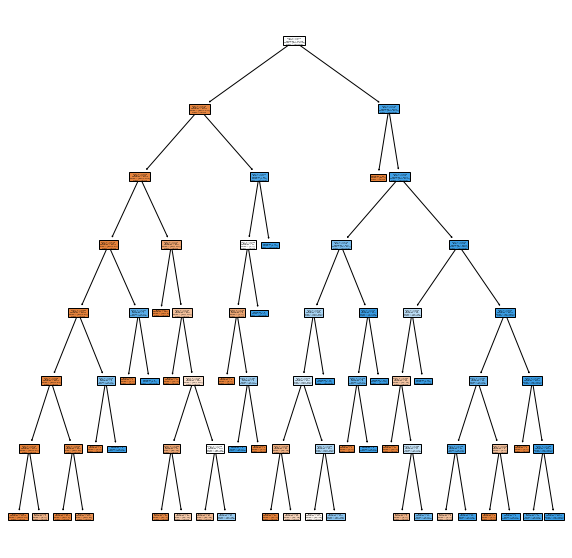

In [ ]:
clf.predict(X_test)
cn=['setosa', 'versicolor', 'virginica']
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, ax=ax, class_names=cn, filled = True);

## Menggunakan isFirstBlood

In [ ]:
te = TargetEncoder()

In [ ]:
X = df1[['goldDiff', 'expDiff','champLevelDiff','isFirstBlood','killedFireDrake','killedWaterDrake','killedAirDrake','killedEarthDrake','killedElderDrake','lostFireDrake','lostWaterDrake','lostAirDrake','lostEarthDrake','lostElderDrake','killedBaronNashor','lostBaronNashor','killedRiftHerald','lostRiftHerald','kills','deaths','assists','wardsPlaced','wardsDestroyed','wardsLost']] # Features
y = df1[['hasWon']] # Target variable
te.fit(X, y)
X = te.transform(X)

X.head()

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,goldDiff,expDiff,champLevelDiff,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,0.976445,0.503332,0.994100,0.503655,0.814642,0.384540,0.400493,0.664894,0.496113,0.625473,0.332349,0.611093,0.624454,0.512195,0.805405,0.719019,0.587913,0.428059,0.584416,0.832792,0.572327,0.550000,0.472889,0.483304
1,0.866425,0.866425,1.000000,0.503655,0.385489,0.384540,0.645789,0.388770,0.496113,0.625473,0.332349,0.611093,0.624454,0.512195,0.323408,0.719019,0.324148,0.303508,0.557883,0.949749,0.571142,0.470395,0.492253,0.566726
2,0.503332,0.940796,0.983193,0.503655,0.673332,0.384540,0.645789,0.664894,0.496113,0.625473,0.630576,0.611093,0.347691,0.512195,0.805405,0.719019,0.324148,0.303508,0.751220,0.465909,0.701058,0.536023,0.536272,0.472441
3,0.500896,0.503332,0.005470,0.503655,0.385489,0.675379,0.400493,0.664894,0.496113,0.109325,0.630576,0.611093,0.624454,0.512195,0.323408,0.145112,0.324148,0.303508,0.709634,0.407317,0.719243,0.467742,0.509202,0.442804
4,0.503332,0.135367,0.002500,0.503655,0.385489,0.384540,0.400493,0.388770,0.496113,0.336046,0.332349,0.363558,0.624454,0.512195,0.323408,0.719019,0.324148,0.303508,0.048469,0.376623,0.116838,0.427632,0.401316,0.567647


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
# Membuat Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=7, criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict datatest
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9700545921644188


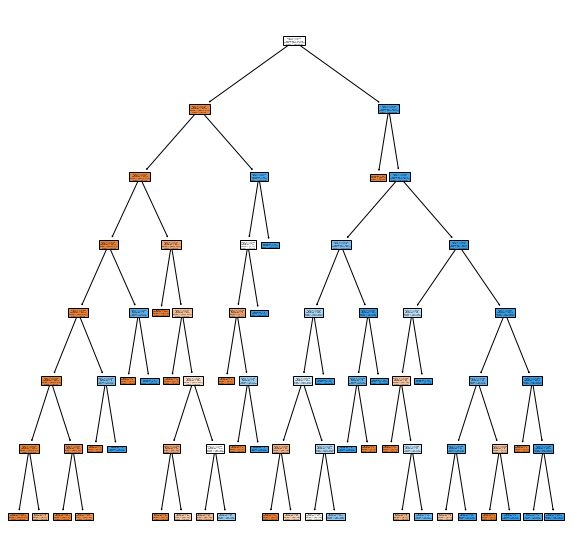

In [ ]:
clf.predict(X_test)
cn=['setosa', 'versicolor', 'virginica']
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, ax=ax, class_names=cn, filled = True);